<a href="https://colab.research.google.com/github/rishabhprasad2003/.ipynb-notebooks/blob/main/Notebooks/D19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#22. REALTIME OBJECT DETECTION USING A VIDEO

import cv2

cascade_src = 'cars.xml'
video_src = 'video1.avi'

cap = cv2.VideoCapture(video_src)  #our video i.e. video1 should be stored in cap
car_cascade = cv2.CascadeClassifier(cascade_src)

while True:
    ret,img = cap.read() #we are reading the data from the cap variable
    if(type(img) == type(None)):
        break

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #grayscale
    
    cars = car_cascade.detectMultiScale(gray,1.1,1)

    for(x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    cv2.imshow('Video',img)

    if cv2.waitKey(1) == 13:
        break

cv2.destroyAllWindows()

In [ ]:
#CLUSTERING - UNSUPERVISIED LEARNING (KMEANS CLUSTERING)
#IN CLUSTERING THERE IS NO OUTPUT
#we only consider i/p to train our model

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape



(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#divide data into input
x = df.iloc[:,[3,4]].values #to make it 2-D we use [3,4]
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
import numpy as np
np.sqrt(200)    #200 is number of rows
# k vlaue should in the range of 2 to 14
#k value should not exceed the total no. of points
#our k value should not exceed 14

14.142135623730951

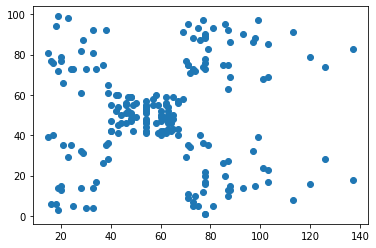

In [ ]:
#visualisation
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
#here we have got ony one cluster before applying any clustring technique

In [ ]:
#we need to find out the number of cluster(k)
# 1. ELBOW METHOD
# 2. SILHOUETTE METHOD - very accurate

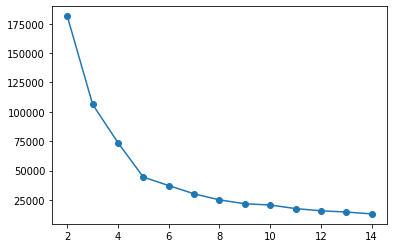

In [ ]:
#ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,15)

sse = []  #blank list
for i in k :
  model_demo = KMeans(n_clusters=i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)  # .inertia claculates the sum of squared erroe

plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
 #we will now consider the elbow point as 5
 # it is a point which goes completely up or down

In [ ]:
#SILHOUETTE METHOD


2Clusters, Score = 0.2968969162503008
3Clusters, Score = 0.46761358158775435
4Clusters, Score = 0.4931963109249047
5Clusters, Score = 0.553931997444648
6Clusters, Score = 0.5379675585622219
7Clusters, Score = 0.5264283703685728
8Clusters, Score = 0.45704384633565154
9Clusters, Score = 0.4563032021725485
10Clusters, Score = 0.4492169169017592
11Clusters, Score = 0.437104484577306
12Clusters, Score = 0.42507724579994494
13Clusters, Score = 0.4361876168478583
14Clusters, Score = 0.40466460708668867


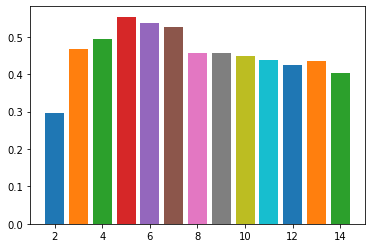

In [ ]:
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i}Clusters, Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))


In [ ]:
#CONFIRMATION - THAT NO. OF CLUSTERS IS 5

In [ ]:
#APPLYING THE  KEMANS ALGORITHM  FOR 5 CLUSTERS
k = 5
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [ ]:
y = model.predict(x)
y


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
y.size

200

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

In [ ]:
np.sum([35,81,22,39,23])

200

In [ ]:
x[y == 1,1]
#so the first '1' is cluster no. 1 and the second '1' is column index no. 1
#the value of input, when cluster 0 is selected and when column 0 is selected

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

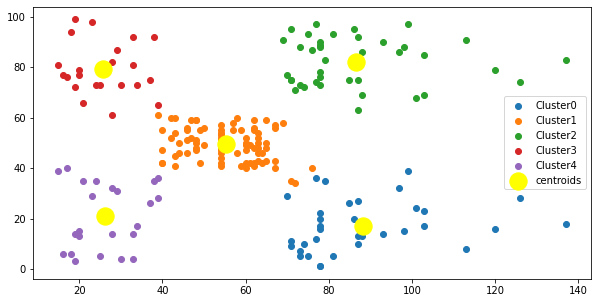

In [ ]:
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y==i,1],label=f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s =300,c='yellow',label = 'centroids')
plt.legend()